### Data Set
The labeled data set consists of 25,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of "Negative", and rating >=7 have a sentiment score of "Positive." No individual movie has more than 30 reviews.

File description
MovieReviewTrainingDatabase.csv - The labeled training set. The file is comma-delimited and has a header row followed by 25,000 rows containing the sentiment and the text for each review.

Data fields
sentiment - Sentiment of the review; "Positive" for positive reviews and "Negative" for negative reviews review - Text of the review

In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('IMDB.csv')

In [3]:
df.head()

,sentiment,review
0,Negative,I had no background knowledge of this movie be...
1,Negative,I am a huge Jane Austen fan and I ordered the ...
2,Negative,Nothing to say but Wow! Has anyone actually ha...
3,Negative,i like Jane Austin novels. I love Pride and Pr...
4,Negative,In this day and age of incredible special movi...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
sentiment    10000 non-null object
review       10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB


In [5]:
df.describe()

,sentiment,review
count,10000,10000
unique,2,9990
top,Negative,This show comes up with interesting locations ...
freq,5081,3


In [6]:
df.isna().sum()

sentiment    0
review       0
dtype: int64

In [7]:
df.isnull().sum()

sentiment    0
review       0
dtype: int64

In [8]:
#Create function to remove punctuation
def no_punc(text):
    no_punc = []
    for punc in text:
        if punc not in string.punctuation:
            no_punc.append(punc)
    no_punc = ''.join(no_punc)
    return no_punc

In [9]:
#remove trailing
df['review'] = df['review'].str.rstrip()

In [10]:
#remove punctuation
df['review'] = df['review'].apply(no_punc)

In [11]:
df['review'][0]

'I had no background knowledge of this movie before I bought it but it sounded cool and Ive been wanting to see a really kickbutt Viking movie for awhile now alas this film was not what I was looking for I had hoped for the best but instead was delivered a boring Nordic soapopera that seemed to drag on too long despite its 84 minute running time The films premise is intriguing enough Its about a Viking warlord who defies his God and Odin is so enraged that he curses the warlords son named Barek to death and rebirth as a Berserker This Barek guy is then forced to live enraged insane and violent lifetime after lifetime The movie is filmed competently enough with some rich cinematography and quasigood performances by the actors but again I found myself bored and questioning when this dribble would end The filmmakers had a chance to make something rather entertaining and semiunique but they dropped the ball Perhaps it couldve been improved with some cheap exploitation tactics thrown in suc

In [12]:
df['review'] = df['review'].str.lower()

In [13]:
df['review'][0]

'i had no background knowledge of this movie before i bought it but it sounded cool and ive been wanting to see a really kickbutt viking movie for awhile now alas this film was not what i was looking for i had hoped for the best but instead was delivered a boring nordic soapopera that seemed to drag on too long despite its 84 minute running time the films premise is intriguing enough its about a viking warlord who defies his god and odin is so enraged that he curses the warlords son named barek to death and rebirth as a berserker this barek guy is then forced to live enraged insane and violent lifetime after lifetime the movie is filmed competently enough with some rich cinematography and quasigood performances by the actors but again i found myself bored and questioning when this dribble would end the filmmakers had a chance to make something rather entertaining and semiunique but they dropped the ball perhaps it couldve been improved with some cheap exploitation tactics thrown in suc

In [14]:
df['review'] = df['review'].str.split()

In [15]:
print(df['review'][0])

['i', 'had', 'no', 'background', 'knowledge', 'of', 'this', 'movie', 'before', 'i', 'bought', 'it', 'but', 'it', 'sounded', 'cool', 'and', 'ive', 'been', 'wanting', 'to', 'see', 'a', 'really', 'kickbutt', 'viking', 'movie', 'for', 'awhile', 'now', 'alas', 'this', 'film', 'was', 'not', 'what', 'i', 'was', 'looking', 'for', 'i', 'had', 'hoped', 'for', 'the', 'best', 'but', 'instead', 'was', 'delivered', 'a', 'boring', 'nordic', 'soapopera', 'that', 'seemed', 'to', 'drag', 'on', 'too', 'long', 'despite', 'its', '84', 'minute', 'running', 'time', 'the', 'films', 'premise', 'is', 'intriguing', 'enough', 'its', 'about', 'a', 'viking', 'warlord', 'who', 'defies', 'his', 'god', 'and', 'odin', 'is', 'so', 'enraged', 'that', 'he', 'curses', 'the', 'warlords', 'son', 'named', 'barek', 'to', 'death', 'and', 'rebirth', 'as', 'a', 'berserker', 'this', 'barek', 'guy', 'is', 'then', 'forced', 'to', 'live', 'enraged', 'insane', 'and', 'violent', 'lifetime', 'after', 'lifetime', 'the', 'movie', 'is', 'f

In [16]:
#Create a function to remove stopwords
def clean_stopwords(text):
    clean_stopwords = []
    for word in text:
        if word not in stopwords.words('english'):
            clean_stopwords.append(word)
    return clean_stopwords

In [17]:
#remove stopwords
df['review'] = df['review'].apply(clean_stopwords)

In [18]:
print(df['review'][0])

['background', 'knowledge', 'movie', 'bought', 'sounded', 'cool', 'ive', 'wanting', 'see', 'really', 'kickbutt', 'viking', 'movie', 'awhile', 'alas', 'film', 'looking', 'hoped', 'best', 'instead', 'delivered', 'boring', 'nordic', 'soapopera', 'seemed', 'drag', 'long', 'despite', '84', 'minute', 'running', 'time', 'films', 'premise', 'intriguing', 'enough', 'viking', 'warlord', 'defies', 'god', 'odin', 'enraged', 'curses', 'warlords', 'son', 'named', 'barek', 'death', 'rebirth', 'berserker', 'barek', 'guy', 'forced', 'live', 'enraged', 'insane', 'violent', 'lifetime', 'lifetime', 'movie', 'filmed', 'competently', 'enough', 'rich', 'cinematography', 'quasigood', 'performances', 'actors', 'found', 'bored', 'questioning', 'dribble', 'would', 'end', 'filmmakers', 'chance', 'make', 'something', 'rather', 'entertaining', 'semiunique', 'dropped', 'ball', 'perhaps', 'couldve', 'improved', 'cheap', 'exploitation', 'tactics', 'thrown', 'gratuitous', 'nudity', 'lots', 'gore', 'mean', 'talking', 'b

In [19]:
df['review'] = df['review'].str.join(' ') 

In [20]:
df['review'][0]

'background knowledge movie bought sounded cool ive wanting see really kickbutt viking movie awhile alas film looking hoped best instead delivered boring nordic soapopera seemed drag long despite 84 minute running time films premise intriguing enough viking warlord defies god odin enraged curses warlords son named barek death rebirth berserker barek guy forced live enraged insane violent lifetime lifetime movie filmed competently enough rich cinematography quasigood performances actors found bored questioning dribble would end filmmakers chance make something rather entertaining semiunique dropped ball perhaps couldve improved cheap exploitation tactics thrown gratuitous nudity lots gore mean talking berserkers arent vikings supposed bad enough raping pillaging arent berserkers supposed even extreme unless youre fan young restless etc fact insane berserker likes self torture id probably steer clear drab piece celluloid'

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
X = df['review']
X

0       background knowledge movie bought sounded cool...
1       huge jane austen fan ordered movie amazonuk co...
2       nothing say wow anyone actually somebody sneak...
3       like jane austin novels love pride prejudice s...
4       day age incredible special movie effects one s...
                              ...                        
9995    first saw movie back early90s first released r...
9996    nyc 2022 greenhouse effect vanished oceans gri...
9997    individuals familiar asian cinema whole aware ...
9998    kids aged 7 14 got huge kick film gave copy ki...
9999    love movie animation great pokã©mon movie cgi ...
Name: review, Length: 10000, dtype: object

In [23]:
y = df['sentiment']
y

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
9995    Positive
9996    Positive
9997    Positive
9998    Positive
9999    Positive
Name: sentiment, Length: 10000, dtype: object

In [24]:
cv = CountVectorizer()

In [25]:
X = cv.fit_transform(X)

In [26]:
X.shape

(10000, 70725)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import classification_report

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
rf_model = RandomForestClassifier(n_estimators=17)

In [75]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=17,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf_pred = rf_model.predict(X_test)

[[1306  395]
 [ 351 1248]]


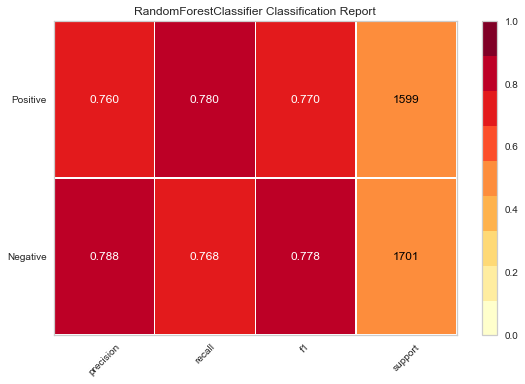

In [85]:
print(confusion_matrix(y_test, rf_pred))
visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

In [33]:
nb_model = MultinomialNB()

In [34]:
nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
nb_pred = nb_model.predict(X_test)

[[1454  247]
 [ 291 1308]]


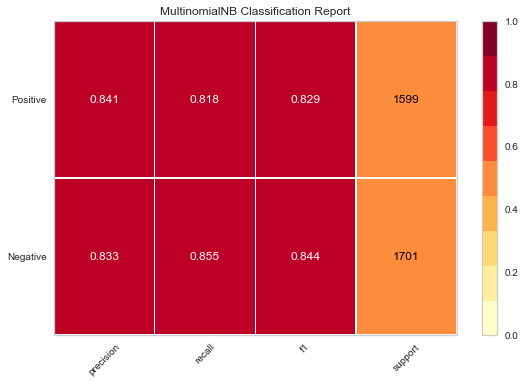

In [86]:
print(confusion_matrix(y_test, nb_pred))
visualizer = ClassificationReport(nb_model, support=True)
visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data